<a href="https://colab.research.google.com/github/sankethchebbi/ingenius/blob/main/stonks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock


In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key="1d27fe4d5eb15d9cb62a33d018ff8f9e356404cf"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-08 00:00:00+00:00,111.06,111.720,109.70,110.31,24254179,26.131551,26.286844,25.811554,25.955082,97016716,0.0,1.0
1,AAPL,2016-11-09 00:00:00+00:00,110.88,111.320,108.05,109.88,59176361,26.089199,26.192727,25.423322,25.853907,236705444,0.0,1.0
2,AAPL,2016-11-10 00:00:00+00:00,107.79,111.090,105.83,111.09,57134541,25.362146,26.138610,24.900973,26.138610,228538164,0.0,1.0
3,AAPL,2016-11-11 00:00:00+00:00,108.43,108.870,106.55,106.92,34143898,25.512733,25.616261,25.070384,25.157442,136575592,0.0,1.0
4,AAPL,2016-11-14 00:00:00+00:00,105.71,107.809,104.08,107.32,51175504,24.872738,25.366616,24.489212,25.251559,204702016,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-11-01 00:00:00+00:00,148.96,149.70,147.80,148.985,73396551,148.743688,149.482614,147.585373,148.768652,73396551,0.00,1.0
1254,AAPL,2021-11-02 00:00:00+00:00,150.02,151.57,148.65,148.660,68922374,149.802149,151.349898,148.434139,148.444124,68922374,0.00,1.0
1255,AAPL,2021-11-03 00:00:00+00:00,151.49,151.97,149.82,150.390,54511534,151.270015,151.749317,149.602440,150.171612,54511534,0.00,1.0
1256,AAPL,2021-11-04 00:00:00+00:00,150.96,152.43,150.64,151.580,60394616,150.740784,152.208650,150.421249,151.359884,60394616,0.00,1.0
1257,AAPL,2021-11-05 00:00:00+00:00,151.28,152.20,150.06,151.890,65463883,151.280000,152.200000,150.060000,151.890000,65463883,0.22,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       111.06
1       110.88
2       107.79
3       108.43
4       105.71
         ...  
1253    148.96
1254    150.02
1255    151.49
1256    150.96
1257    151.28
Name: close, Length: 1258, dtype: float64

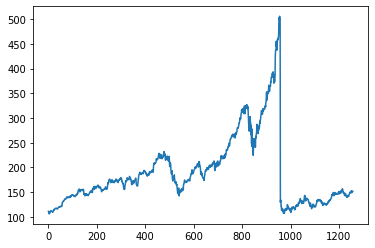

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0       111.06
1       110.88
2       107.79
3       108.43
4       105.71
         ...  
1253    148.96
1254    150.02
1255    151.49
1256    150.96
1257    151.28
Name: close, Length: 1258, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.01336231]
 [0.01291273]
 [0.00519506]
 ...
 [0.11434138]
 [0.11301763]
 [0.11381687]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.01328738],
       [0.01600979],
       [0.02058045],
       [0.01895699],
       [0.02367751],
       [0.02367751],
       [0.02525101],
       [0.02562566],
       [0.02729907],
       [0.02807333],
       [0.02834807],
       [0.0264249 ],
       [0.02699935],
       [0.02884759],
       [0.02759878],
       [0.02752385],
       [0.02525101],
       [0.02607523],
       [0.02575054],
       [0.02722414],
       [0.03047105],
       [0.03316849],
       [0.03346821],
       [0.03506669],
       [0.03381787],
       [0.03329337],
       [0.03569109],
       [0.035

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 2s 194ms/step - loss: 4.9674e-04 - val_loss: 0.0223
Epoch 2/10
12/12 [==============================] - 2s 194ms/step - loss: 4.8959e-04 - val_loss: 0.0214
Epoch 3/10
12/12 [==============================] - 2s 199ms/step - loss: 4.8160e-04 - val_loss: 0.0211
Epoch 4/10
12/12 [==============================] - 2s 194ms/step - loss: 4.7151e-04 - val_loss: 0.0218
Epoch 5/10
12/12 [==============================] - 2s 193ms/step - loss: 4.5016e-04 - val_loss: 0.0220
Epoch 6/10
12/12 [==============================] - 2s 195ms/step - loss: 4.4341e-04 - val_loss: 0.0225
Epoch 7/10
12/12 [==============================] - 2s 194ms/step - loss: 4.3991e-04 - val_loss: 0.0205
Epoch 8/10
12/12 [==============================] - 2s 193ms/step - loss: 4.0156e-04 - val_loss: 0.0192
Epoch 9/10
12/12 [==============================] - 2s 195ms/step - loss: 3.9260e-04 - val_loss: 0.0209
Epoch 10/10
12/12 [==============================] - 2s 192ms/st

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

196.1440255783044

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

208.1709489305459

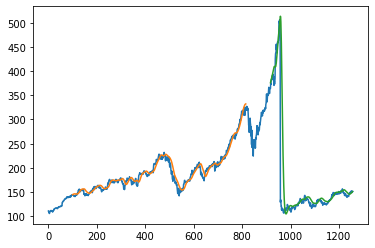

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692791847748,
 0.10682351765822468,
 0.1016034766971377,
 0.09176282531594981,
 0.10100404615615166,
 0.09913082571557025,
 0.1026275038713223,
 0.1070233278385534,
 0.1080973075578201,
 0.10255257505369902,
 0.0980818222688446,
 0.09973025625655624,
 0.10027973425246023,
 0.0994305409860633,
 0.10402617513362311,
 0.10300214795943852,
 0.10327688695739051,
 0.10097906988361055,
 0.10085418852090516,
 0.0996303511663919,
 0.10027973425246023,
 0.10784754483240916,
 0.10837204655577198,
 0.1134172536090714,
 0.11109446026275038,
 0.10152854787951449,
 0.10237774114591136,
 0.10609920575453319,


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11492221]
101
1 day input [0.06181627 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499
 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885
 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026 0.10849693
 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275
 0.10702333 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973
 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419
 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446
 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238
 0.10447575 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625
 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598
 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105
 0.10025476 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192
 0.08939008 0.09226235 0.08349568 0.088416   0.09063889 0.09386083
 0.09288676 0.09266197 0.08941506 0.08791648 0.09503472 0.09773215
 0.1020031  0.10752285 0.10877167 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

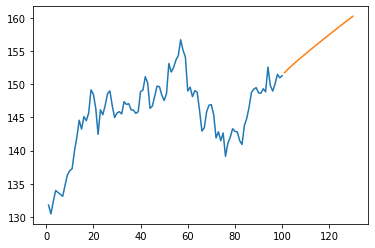

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

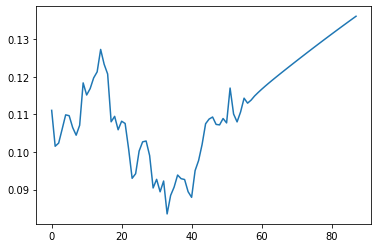

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

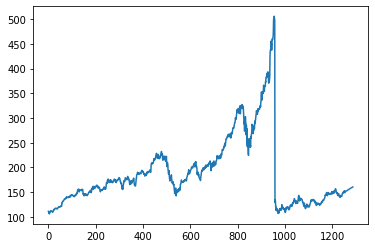

In [ ]:
plt.plot(df3)